In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


In [3]:
from wordcloud import WordCloud

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuvra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yuvra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
from scikitplot.metrics import plot_confusion_matrix

In [7]:
df_train = pd.read_csv('train.txt', delimiter=';', names=['text', 'label'])
df_val = pd.read_csv('val.txt', delimiter=';', names=['text', 'label'])

In [8]:
df_train

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [9]:
df =pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [10]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
df.tail()

,text,label
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy
17999,i feel like i just wanna buy any cute make up ...,joy


In [12]:
df.shape

(18000, 2)

In [13]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [14]:
df.label.value_counts()

label
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

<Axes: xlabel='label'>

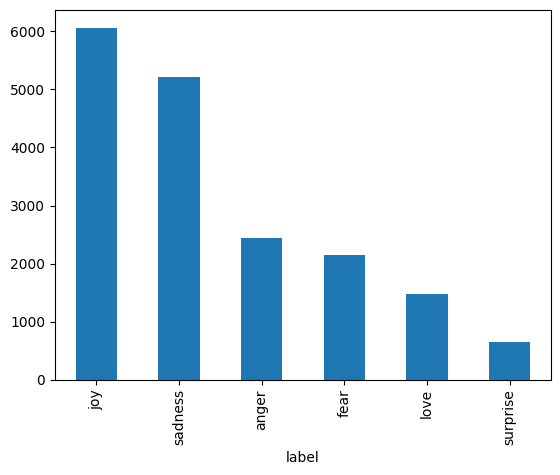

In [15]:
df.label.value_counts().plot.bar()

In [16]:
df['label'] = df['label'].replace(
    to_replace=['joy', 'love', 'surprise'], value=1
)
df['label'] = df['label'].replace(
    to_replace=['anger', 'fear', 'sadness'], value=0
)


C:\Users\yuvra\AppData\Local\Temp\ipykernel_10448\3415036325.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace(


In [17]:
df.head(15)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,1
7,i feel as confused about life as a teenager or...,0
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,1


<Axes: xlabel='label'>

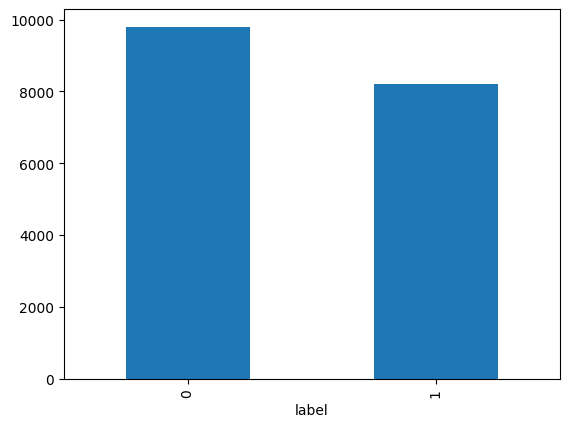

In [18]:
df.label.value_counts().plot.bar()

In [19]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [20]:
lm = WordNetLemmatizer()

In [21]:
def transformation(df_column):
    output = []
    for i in df.text:
        new_text = re.sub('[^a-zA-Z]', ' ', str(i))
        new_text = new_text.lower()
        new_text = new_text.split()
        new_text = [lm.lemmatize(j) for j in new_text if not j in set(stopwords.words('english'))]
        output.append(' '.join(str(k)for k in new_text))
    return output

In [22]:
var = transformation(df.text)

In [23]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

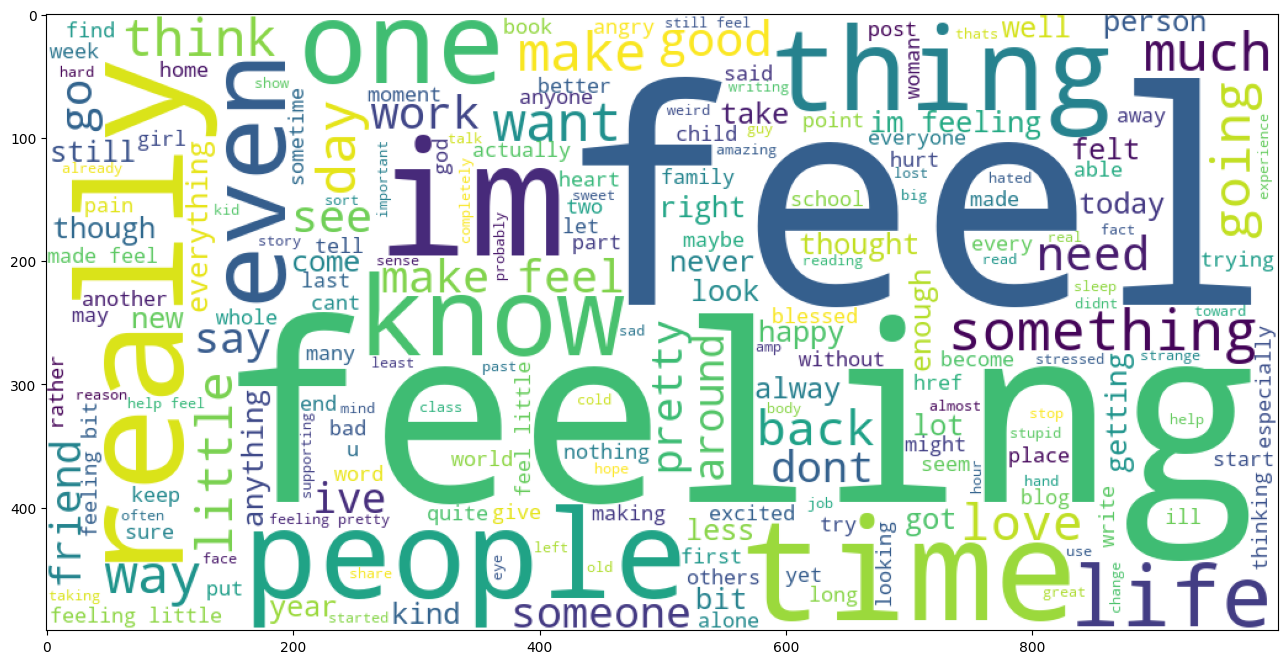

In [24]:
plt.figure(figsize=(20, 8))
word = ''
for i in var:
    for j in i:
        word += " ".join(j)
wc = WordCloud(width=1000, height=500, background_color='white').generate(word)
plt.imshow(wc)

In [25]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(var)
X_train = traindata
y_train = df.label

In [26]:
model = RandomForestClassifier()

In [27]:
parameters = {'max_features':('auto', 'sqrt'), 
              'n_estimators':[500, 1000, 1500],
              'max_depth':[5, 10, None],
              'min_samples_leaf':[1, 2, 5, 10],
              'min_samples_split':[5, 10, 15],
              'bootstrap':[True, False]}

In [28]:
parameters

{'max_features': ('auto', 'sqrt'),
 'n_estimators': [500, 1000, 1500],
 'max_depth': [5, 10, None],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'bootstrap': [True, False]}

In [29]:
grid_search = GridSearchCV(model, parameters, cv = 5, return_train_score=True, n_jobs=1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                             n_estimators=grid_search.best_params_['n_estimators'],
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             bootstrap=grid_search.best_params_['bootstrap'])

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
test_data = X_test, y_test # type: ignore 

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
def sentimental_analysis(input):
    new_input = transformation(input)
    transformed_input = cv.transform(new_input)
    prediction = rfc.predict(transformed_input)
    if prediction == 0:
        print('Negative Sentiment')
    elif prediction == 1:
        print('Positive Sentiment')
    else:
        print('Invalid Statement')